In [1]:
import numpy as np
import pandas as pds
from matplotlib import pyplot as plt

In [14]:
vizier_data = pds.read_csv('data/asu_2.tsv', sep = ';', error_bad_lines=False, skiprows = 3, names = ['RAJ2000', 'DEJ2000', 'logT', 'logL', 'AV', 'logAc', 'M.S0', 'logA0',
       'M.P9', 'logA9', 'Mm'])

In [15]:
vizier_data.keys()

Index(['RAJ2000', 'DEJ2000', 'logT', 'logL', 'AV', 'logAc', 'M.S0', 'logA0',
       'M.P9', 'logA9', 'Mm'],
      dtype='object')

In [16]:
vizier_data.head()

,RAJ2000,DEJ2000,logT,logL,AV,logAc,M.S0,logA0,M.P9,logA9,Mm
0,05 35 47.02,-05 17 56.91,3.615,2.739,7.263,-5.00,,,,,0.0
1,05 35 20.71,-05 21 44.45,4.251,2.628,2.184,-1.31,,,,,99.0
2,05 35 05.21,-05 14 50.37,3.768,1.529,2.665,-0.53,2.918,6.326,2.850,5.854,97.0
3,05 35 21.32,-05 12 12.74,3.768,1.359,2.027,-0.79,2.570,6.469,2.450,6.226,70.0
4,05 34 49.98,-05 18 44.61,3.936,1.625,2.511,-0.72,2.342,6.684,2.400,6.434,92.0


In [57]:
def hms_to_deg(vizier_data):
    data = vizier_data.split(' ')

    h = float(data[0]) * 15
    m = float(data[1]) / 60
    s = float(data[2]) / 60**2

    return h + m + s

In [59]:
vizier_data['RAJ2000'] = [hms_to_deg(vizier_data['RAJ2000'][idx]) for idx in range(len(vizier_data['RAJ2000']))]

In [12]:
vizier_data = vizier_data.apply(pds.to_numeric, errors='coerce')

In [61]:
vizier_data['DEJ2000'] = [hms_to_deg(vizier_data['DEJ2000'][idx]) for idx in range(len(vizier_data['DEJ2000']))]

In [62]:
vizier_data.head()

,index,RAJ2000,DEJ2000,logT,logL,AV,logAc,M.S0,logA0,M.P9,logA9,Mm
0,2,75.584781,-74.752675,3.768,1.529,2.665,-0.53,2.918,6.326,2.850,5.854,97.0
1,3,75.589256,-74.796461,3.768,1.359,2.027,-0.79,2.570,6.469,2.450,6.226,70.0
2,4,75.580550,-74.687608,3.936,1.625,2.511,-0.72,2.342,6.684,2.400,6.434,92.0
3,6,75.588047,-74.637383,3.969,1.371,1.345,-0.72,2.155,6.941,2.250,6.695,99.0
4,7,75.584900,-74.577931,3.699,0.926,0.769,-1.49,2.515,6.209,2.487,5.667,99.0


In [63]:
vizier_data.replace('      ', np.nan, inplace=True)

In [64]:
vizier_data = vizier_data.dropna()

In [65]:
vizier_data = vizier_data.reset_index()

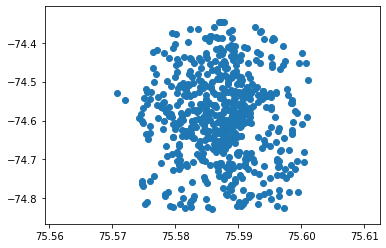

In [67]:
plt.scatter(vizier_data['RAJ2000'], vizier_data['DEJ2000'])

In [79]:
def get_object_size(sky, multiple = 1000):
    
    lums = np.power(10, np.array((sky['logL'])).astype(float))/np.power(10, np.array((sky['logT'])).astype(float))
    normalized_lums = (lums - lums.min())/(lums.max() - lums.min())
    
    return normalized_lums * multiple

In [80]:
get_object_size(vizier_data)

array([1.00000000e+03, 6.75714059e+02, 8.47053418e+02, 4.36881486e+02,
       2.91609353e+02, 6.40800942e+02, 2.36815810e+02, 4.49153197e+02,
       1.44572751e+02, 1.90504689e+02, 1.97696770e+02, 1.67320127e+02,
       2.38465233e+02, 2.86266095e+02, 8.78884733e+02, 2.20422602e+02,
       2.60374718e+02, 8.29026837e+01, 3.69110463e+02, 1.00134234e+02,
       2.90936051e+02, 1.85711612e+02, 1.02493188e+02, 1.24607126e+02,
       1.09394685e+02, 2.34634227e+02, 1.15674929e+02, 2.68942272e+02,
       1.80201384e+02, 1.78538846e+02, 8.46624716e+01, 1.22881825e+02,
       1.64626653e+02, 1.62729150e+02, 1.01071303e+02, 6.39324521e+02,
       1.50738894e+02, 1.33600396e+02, 7.82014699e+01, 1.17299972e+02,
       1.12230085e+02, 1.33911002e+02, 7.02275685e+01, 5.22553093e+01,
       1.53562514e+02, 9.85149878e+01, 3.16178813e+02, 1.00134234e+02,
       6.42485188e+01, 3.17643485e+02, 8.68634426e+01, 5.82211391e+01,
       1.24607126e+02, 5.36249742e+01, 8.40718189e+01, 6.82826335e+01,
      

In [82]:
aspect = lambda ra, dec: 1/np.cos((dec[0] + dec[1])/2*np.pi/180)

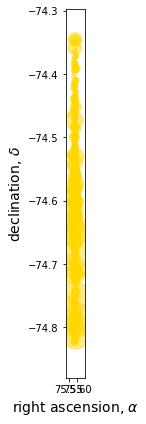

In [83]:
fig = plt.figure(figsize = (6, 6))
ax = plt.subplot(111, aspect = aspect(vizier_data['RAJ2000'], vizier_data['DEJ2000']))

ax.scatter(vizier_data['RAJ2000'], vizier_data['DEJ2000'], color = 'gold', alpha = 0.5, s = get_object_size(vizier_data))

ax.set_ylabel(r'declination, $\delta$', fontsize = 14)
ax.set_xlabel(r'right ascension, $\alpha$', fontsize = 14)

fig.tight_layout()

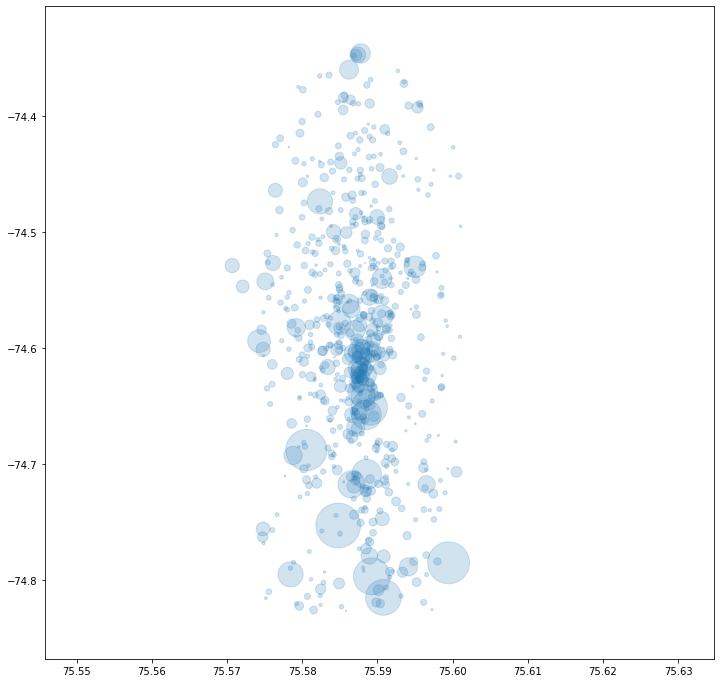

In [86]:
fig, ax = plt.subplots(1, 1, figsize = (12, 12))
ax.scatter(vizier_data['RAJ2000'], vizier_data['DEJ2000'], s = get_object_size(vizier_data, multiple = 2000), alpha = 0.2)

$L = \sigma A T^4$

$A \approx \dfrac{L}{T^4}$

$A = \pi R^2$

$V = \frac{4}{3} \pi R^3$

In [87]:
vizier_data['RAJ2000'].min()

75.57068888888888

In [90]:
vizier_data['DEJ2000'].min()

-74.82620555555555